<IPython.core.display.Javascript object>


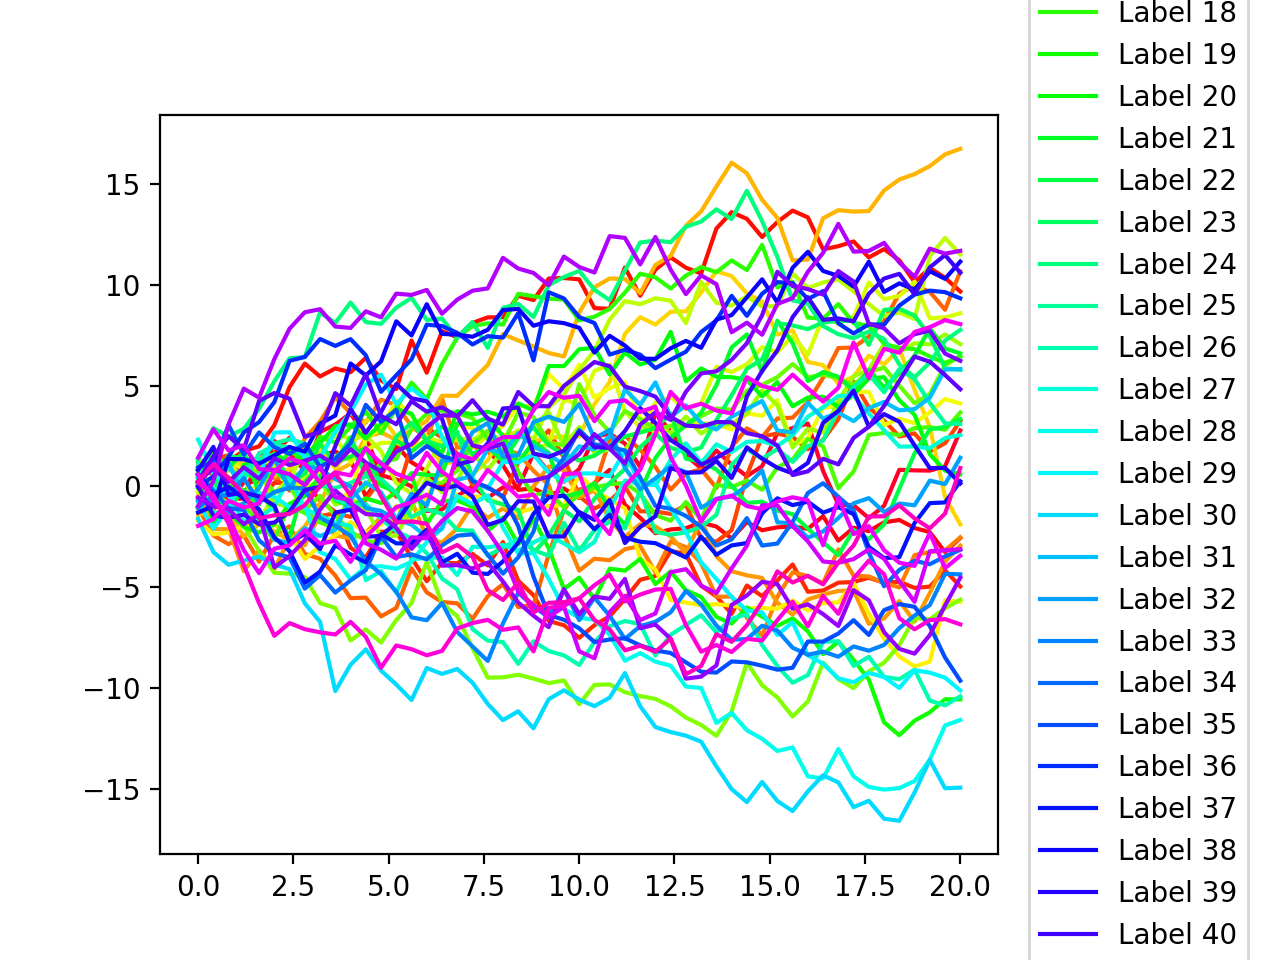

In [5]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np

%matplotlib notebook
n = 50
t = np.linspace(0,20,51)
data = np.cumsum(np.random.randn(51,n), axis=0)

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.78)
ax.set_prop_cycle(color=plt.cm.gist_rainbow(np.linspace(0,1,data.shape[1])))

for i in range(data.shape[1]):
    ax.plot(t, data[:,i], label=f"Label {i}")


legend = ax.legend(loc="upper left", bbox_to_anchor=(1.02, 0, 0.07, 1))

# pixels to scroll per mousewheel event
d = {"down" : 3, "up" : -3}

def func(evt):
    if legend.contains(evt):
        bbox = legend.get_bbox_to_anchor()
        # there should be a limit for scrolling legend
        bbox = Bbox.from_bounds(bbox.x0, bbox.y0+d[evt.button], bbox.width, bbox.height)
        tr = legend.axes.transAxes.inverted()
        legend.set_bbox_to_anchor(bbox.transformed(tr))
        fig.canvas.draw_idle()

fig.canvas.mpl_connect("scroll_event", func)

plt.show()